<a href="https://colab.research.google.com/github/radhika1234567/Age-related-condition/blob/main/skfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/Colab Notebooks"

cleaned_data  modeling.ipynb  skfold.ipynb  test.csv  train.csv


In [5]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [6]:
train_df=pd.read_csv("cleaned_data")

In [7]:
X=train_df.iloc[:,1:57]

In [8]:
y=train_df.iloc[:,57]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [12]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
from collections import Counter
Counter(y_train)

Counter({1: 86, 0: 407})

In [16]:
os=SMOTE(random_state=2)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 407, 1: 86})
The number of classes after fit Counter({1: 407, 0: 407})


In [17]:
from sklearn import metrics
def plot_roc_curve(y_test, y_pred):
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(10, 8), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [18]:
#calculate precision and recall
def plot_precision_recall_curve(y_test, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

In [28]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
st_kf=StratifiedKFold( n_splits=5)
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=st_kf, return_train_score=True,scoring = 'roc_auc' )
#xgbc_grid.fit(X_train_ns,y_train_ns,eval_set = (X_test, y_test))
eval_set = [(X_test, y_test)]
xgbc_grid.fit(X_train_ns, y_train_ns,eval_metric="logloss", eval_set=eval_set, verbose=True)

Streaming output truncated to the last 5000 lines.
[10]	validation_0-logloss:0.16417
[11]	validation_0-logloss:0.16420
[12]	validation_0-logloss:0.16362
[13]	validation_0-logloss:0.15682
[14]	validation_0-logloss:0.15411
[15]	validation_0-logloss:0.15582
[16]	validation_0-logloss:0.15475
[0]	validation_0-logloss:0.40511
[1]	validation_0-logloss:0.35523
[2]	validation_0-logloss:0.33291
[3]	validation_0-logloss:0.27547
[4]	validation_0-logloss:0.24458
[5]	validation_0-logloss:0.23219
[6]	validation_0-logloss:0.22651
[7]	validation_0-logloss:0.22299
[8]	validation_0-logloss:0.20714
[9]	validation_0-logloss:0.19816
[10]	validation_0-logloss:0.19942
[11]	validation_0-logloss:0.19173
[12]	validation_0-logloss:0.18731
[13]	validation_0-logloss:0.18666
[14]	validation_0-logloss:0.19395
[15]	validation_0-logloss:0.19559
[0]	validation_0-logloss:0.37520
[1]	validation_0-logloss:0.30998
[2]	validation_0-logloss:0.27721
[3]	validation_0-logloss:0.23468
[4]	validation_0-logloss:0.20569
[5]	validati

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_typ...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.5, 0.6, 0.8],
                         'max_depth': [2, 4, 6],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
             return_train_score=True, scoring='roc_auc')

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=xgbc_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100   2]
 [  3  19]]
0.9596774193548387
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.90      0.86      0.88        22

    accuracy                           0.96       124
   macro avg       0.94      0.92      0.93       124
weighted avg       0.96      0.96      0.96       124



In [30]:
logloss = log_loss(y_test, xgbc_grid.predict_proba(X_test))
logloss

0.11830615409711728

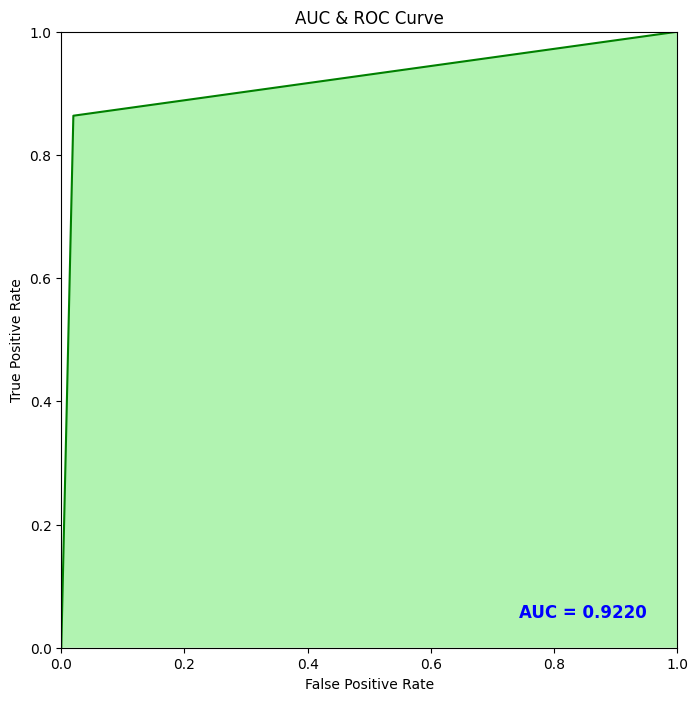

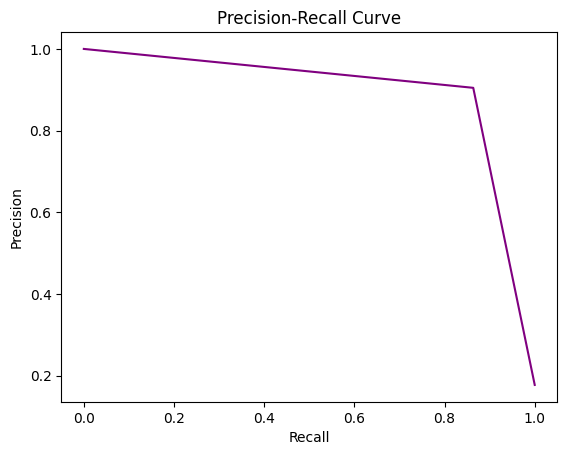

In [31]:
plot_roc_curve(y_test, y_pred)
plot_precision_recall_curve(y_test, y_pred)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = {
    'n_estimators': [700,800,900, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [14,16,18],
    'criterion' :['gini', 'entropy']
}
st_kf=StratifiedKFold( n_splits=5)
rfc_grid = GridSearchCV(rfc, rfc_param,cv=st_kf, return_train_score=True,scoring = 'roc_auc' )
eval_set = [(X_test, y_test)]
rfc_grid.fit(X_train_ns, y_train_ns)
#rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 16, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [700, 800, 900, 1000]},
             return_train_score=True, scoring='roc_auc')

In [38]:
y_pred=rfc_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[97  5]
 [ 2 20]]
0.9435483870967742
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       102
           1       0.80      0.91      0.85        22

    accuracy                           0.94       124
   macro avg       0.89      0.93      0.91       124
weighted avg       0.95      0.94      0.94       124



In [39]:
logloss = log_loss(y_test, rfc_grid.predict_proba(X_test))
logloss

0.2562701544311629

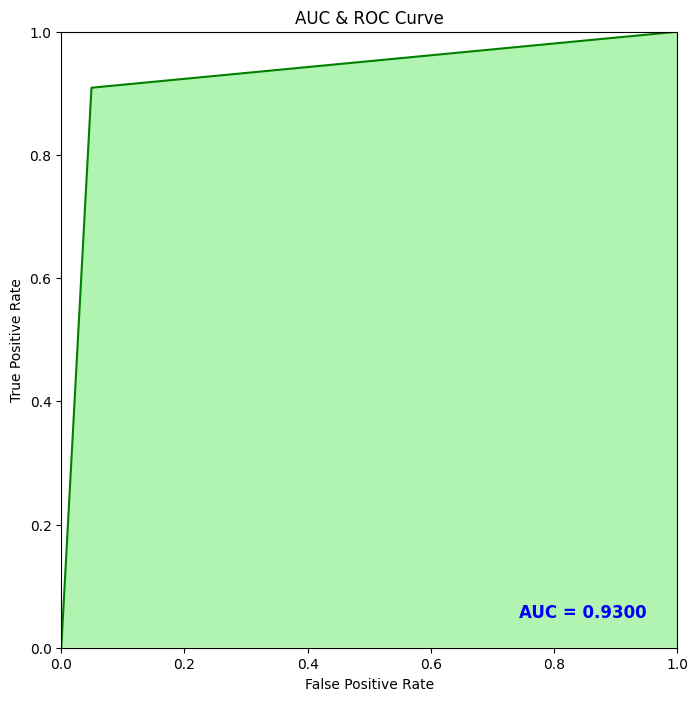

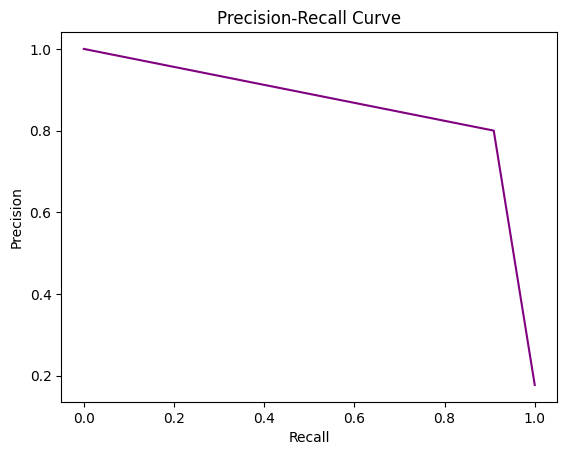

In [40]:
plot_roc_curve(y_test, y_pred)
plot_precision_recall_curve(y_test, y_pred)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(max_iter=1000).fit(X_train_ns, y_train_ns)

In [22]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85 17]
 [ 2 20]]
0.8467741935483871
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       102
           1       0.54      0.91      0.68        22

    accuracy                           0.85       124
   macro avg       0.76      0.87      0.79       124
weighted avg       0.90      0.85      0.86       124



In [23]:
from sklearn.model_selection import GridSearchCV
param_lr = {'C': [1,2,3,10,100],'penalty':['l1', 'l2']}

grid_PLR = GridSearchCV(LogisticRegression(), param_lr, cv=10,
                          return_train_score=True, scoring = 'roc_auc')
grid_PLR.fit(X_train_ns, y_train_ns)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [24]:
y_pred=grid_PLR.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[86 16]
 [ 4 18]]
0.8387096774193549
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       102
           1       0.53      0.82      0.64        22

    accuracy                           0.84       124
   macro avg       0.74      0.83      0.77       124
weighted avg       0.88      0.84      0.85       124



In [25]:
test_df=pd.read_csv("test.csv")

In [26]:
test_df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
test_df['EJ']=test_df['EJ'].map({'A':0,'B':1})

In [32]:
X = test_df.drop(columns=['Id'],axis=0)
final_prediction = xgbc_grid.predict(X)

In [34]:
preds = xgbc_grid.predict_proba(X)
preds

array([[0.07116973, 0.92883027],
       [0.07116973, 0.92883027],
       [0.07116973, 0.92883027],
       [0.07116973, 0.92883027],
       [0.07116973, 0.92883027]], dtype=float32)

In [35]:
final_test = pd.DataFrame({'Id' : test_df['Id'], "class_0" : preds[:, 0], "class_1" : preds[:, 1] })
final_test

,Id,class_0,class_1
0,00eed32682bb,0.07117,0.92883
1,010ebe33f668,0.07117,0.92883
2,02fa521e1838,0.07117,0.92883
3,040e15f562a2,0.07117,0.92883
4,046e85c7cc7f,0.07117,0.92883


In [37]:
final_test.to_csv("submissionxgb",index=False)

In [41]:
final_prediction = rfc_grid.predict(X)

In [43]:
preds = rfc_grid.predict_proba(X)
preds

array([[0.43017669, 0.56982331],
       [0.43017669, 0.56982331],
       [0.43017669, 0.56982331],
       [0.43017669, 0.56982331],
       [0.43017669, 0.56982331]])

In [44]:
final_test = pd.DataFrame({'Id' : test_df['Id'], "class_0" : preds[:, 0], "class_1" : preds[:, 1] })
final_test

,Id,class_0,class_1
0,00eed32682bb,0.430177,0.569823
1,010ebe33f668,0.430177,0.569823
2,02fa521e1838,0.430177,0.569823
3,040e15f562a2,0.430177,0.569823
4,046e85c7cc7f,0.430177,0.569823


In [45]:
final_test.to_csv("submissionrf",index=False)